# Data Science Bootcamp project

## Libraries

In [11]:
import numpy as np
import pandas as pd
import re
import bootcampviztools as bt
from scipy.stats import chi2_contingency, mannwhitneyu, norm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In this document, we will focus the analysis of different features (that can be or not correlated) with some questions.

In [8]:
df_cardiovascular = pd.read_csv("Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_cleaned.csv")

In [9]:
df = df_cardiovascular.copy()

We start with the analysis of feature relationships and answering the following questions:
1. Who has more possibilities to have a heart disease, women or man? There's an age who has more heart diseases? Increasing?
2. How the age and the gender affects to serumcholesterol?
3. Is there any relationship between the age and the maximum heart rate?
4. The serumcholesterol is related to the resting blood pressure? What about serumcholesterol with fasting blood sugar? Is the age an important factor too?
5. Has the fasting blood sugar a relationship with the type of angina? 
6. How many patients that have a chestpain while doing exercise are having an angina?
7. Are the blood pressure and serumcholeseterol risk factors of a heart disease? 
8. How the chest pain and blood pressure affects the maximum heart frequency?
9. Is there any relation between fasting blood sugar, serum cholesterol and the heart disease?
10. Is there any relationship between resting electrocardiogram parameters and their relationship with ST depression (oldpeak) and the ST segment slope?
11. How the number of major vessels affected and the type of chest pain are related to the outcome of heart disease?

1. Who has more possibilities to have a heart disease, women or man? What about gender?

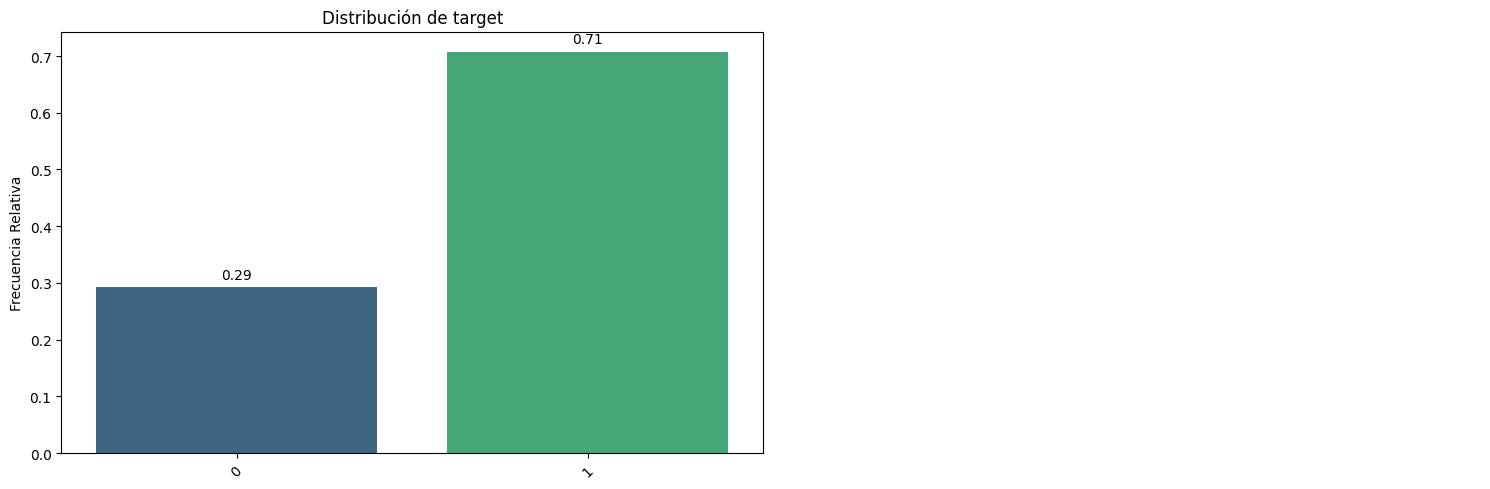

In [26]:
pinta_distribucion_categoricas(df,["target"], relativa= True, mostrar_valores= True)

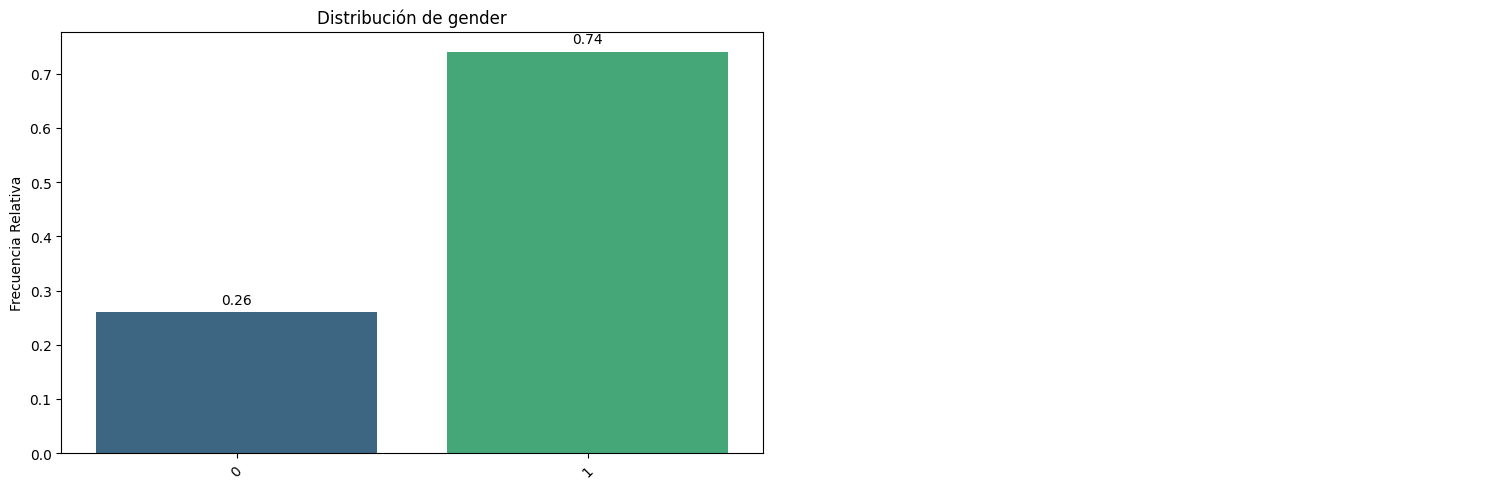

In [27]:
pinta_distribucion_categoricas(df,["gender"], relativa= True, mostrar_valores= True)

On this dataset, we have most of the patients with a heartdisease. And most of the patients of this dataset are man, which can affect to our results.

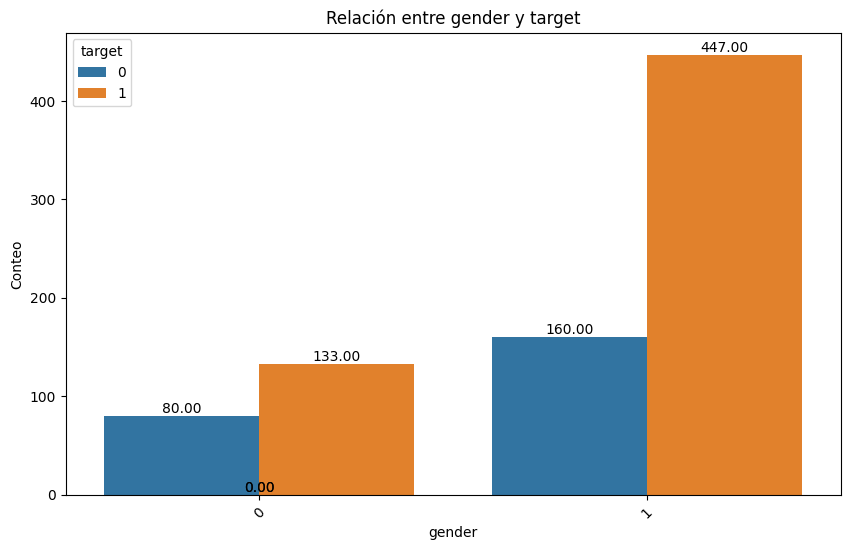

In [28]:
plot_categorical_relationship_fin(df, "gender","target", show_values= True)

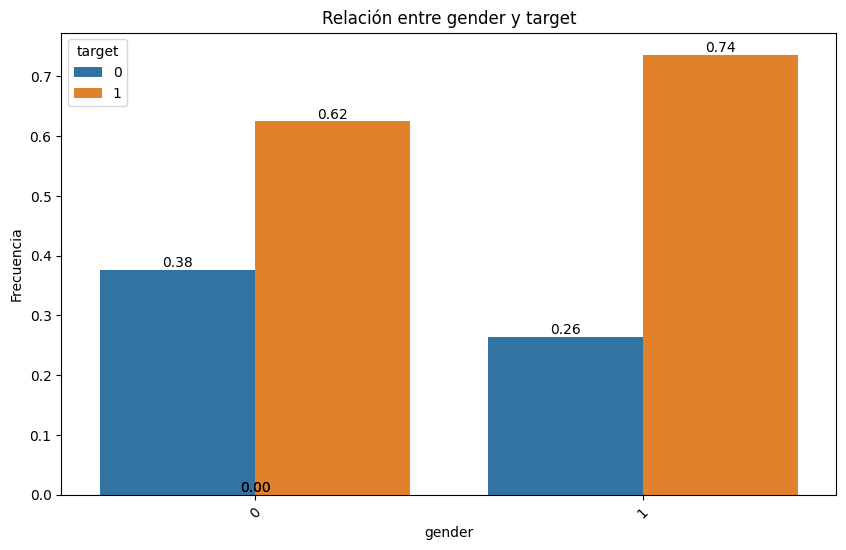

In [29]:
plot_categorical_relationship_fin(df, "gender","target", relative_freq= True, show_values= True)

Men have more heart disease than women. In relative frequencies, 74% of the man has a heart disease and 62% of women has it.

In [30]:
tabla_contingencia = pd.crosstab(df["target"],df["gender"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 9.019750354653057
P-Value: 0.002670778678874063
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 62.34146341 177.65853659]
 [150.65853659 429.34146341]]


Clearly we can reject the null hypothesis of non-dependence and consider that there is a statistically significant relationship between gender and heart disease. Being a man can increaste the possibility to have a heart disease.

But another interesting fact that we could explore in a potential EDA is the age of the patient. To do this, we will create a new column and categorize the age in different bins.

In [31]:
df.age.describe()

count    820.000000
mean      49.106098
std       17.632241
min       20.000000
25%       34.000000
50%       48.500000
75%       64.000000
max       80.000000
Name: age, dtype: float64

In [32]:
df_bins = df.copy()

#Using the percentils for age
bins = [0,34, 49, 64, 100]
df_bins["age_bins"] = pd.cut(df["age"], bins = bins, labels = ["20_34","35_49", "50_64","65_80"])

In [33]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta 1:


c:\Users\rjulianortin\OneDrive\Proyecto-Final-Master\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


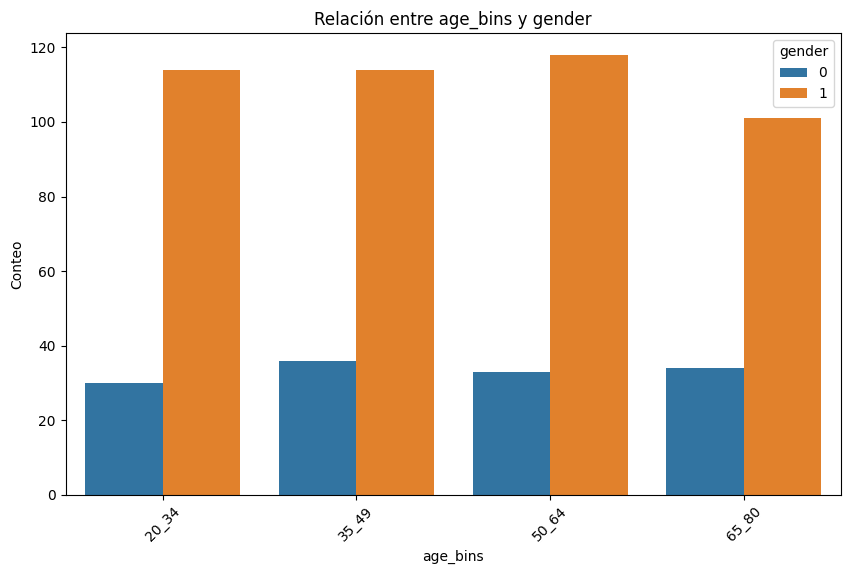

Respuesta 0:


c:\Users\rjulianortin\OneDrive\Proyecto-Final-Master\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


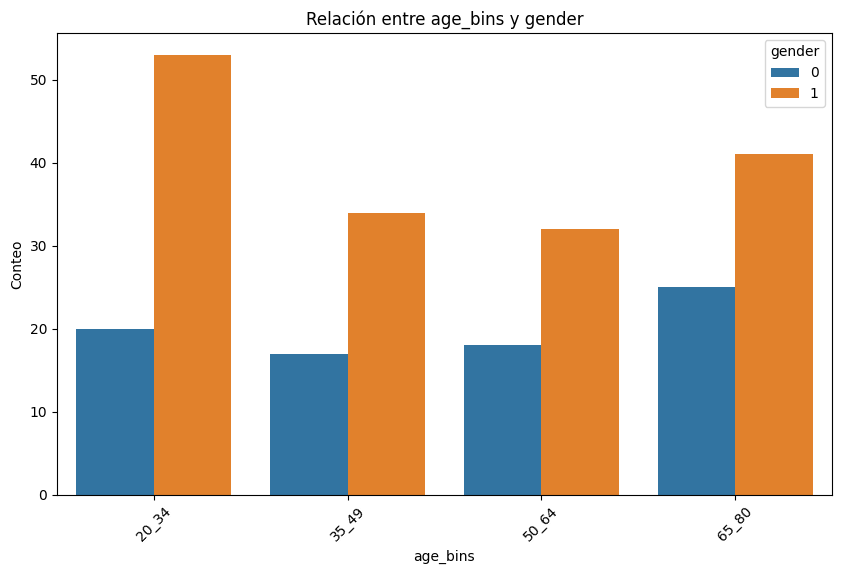

In [34]:
tricategorical_analysis(df_bins, "target", ["gender","age_bins"])

The histograms seems to be really similar between ages, does it mean that age is not significant with the target?

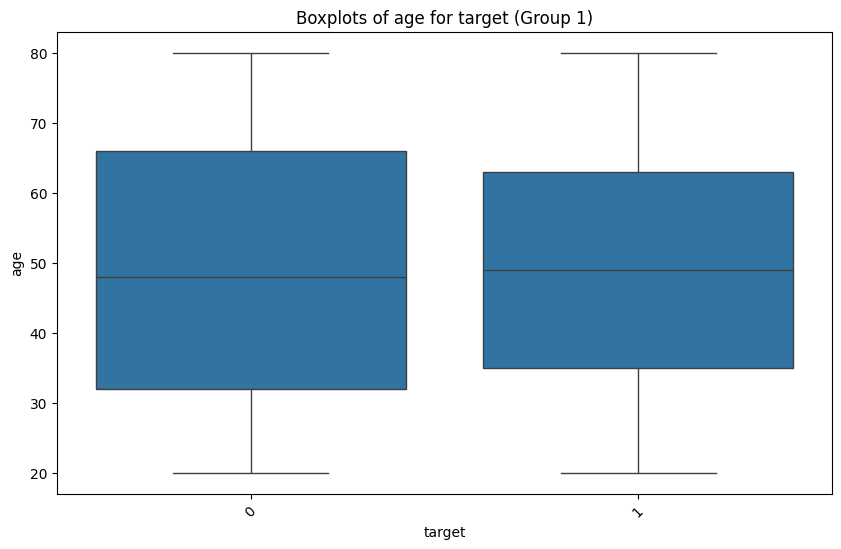

In [35]:
plot_grouped_boxplots(df,"target","age")

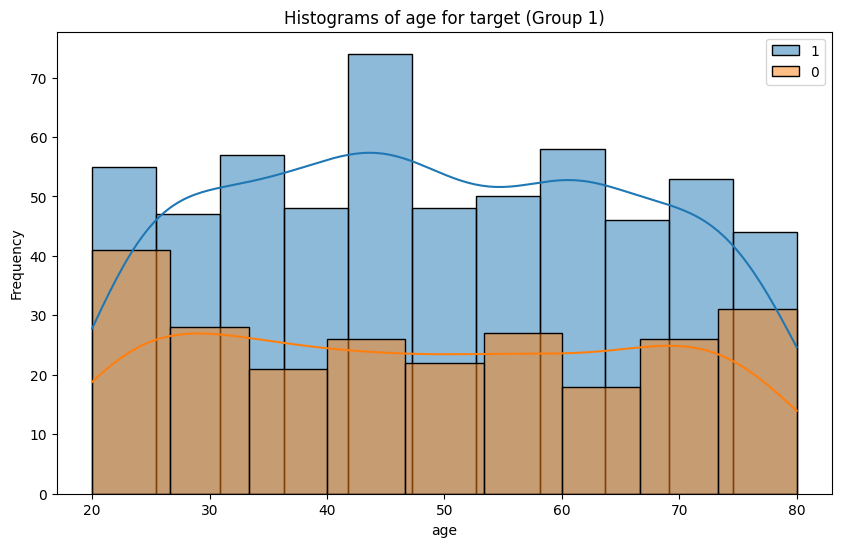

In [36]:
plot_grouped_histograms(df, "target","age", group_size = 2)

Visually it seems that there is no influence.

Doing the Mann-Whitney U test

In [37]:
grupo_a = df.loc[df.target == 1]["age"]
grupo_b = df.loc[df.target == 0]["age"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 71767.0
Valor p: 0.48258884900833654


With p-value > 0.05, we can say that there is no statistical confidence in the relationship between both variables.

2. How the age and the gender affects to serumcholesterol?

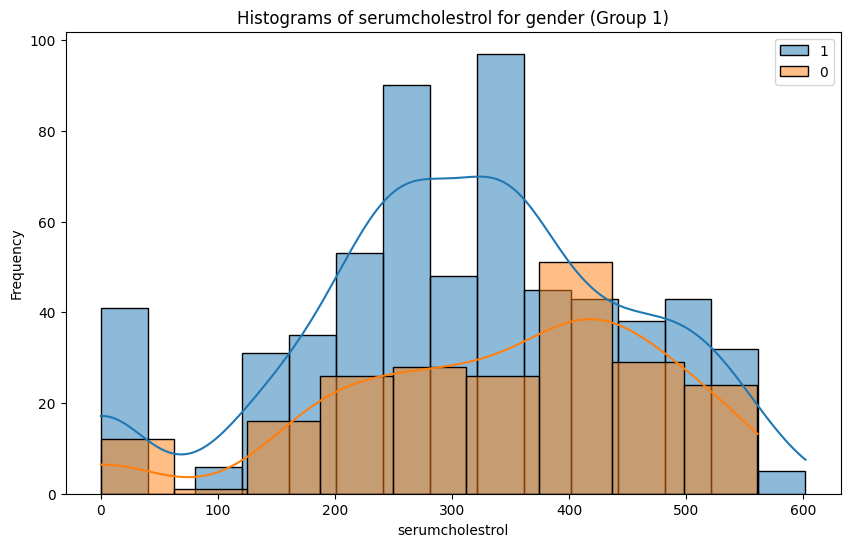

In [38]:
plot_grouped_histograms(df_bins, "gender","serumcholestrol", group_size = 2)

In [39]:
grupo_a = df.loc[df.gender == 1]["serumcholestrol"]
grupo_b = df.loc[df.gender == 0]["serumcholestrol"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 55659.5
Valor p: 0.0025141598343452905


With p-value < 0.05, we can say that there is statistical confidence in the relationship between both variables.
Therefore, man has higher serumcholesterol in blood than women.

In [40]:
col_directora = "gender"
col_1 = "serumcholestrol"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

Respuesta 1:


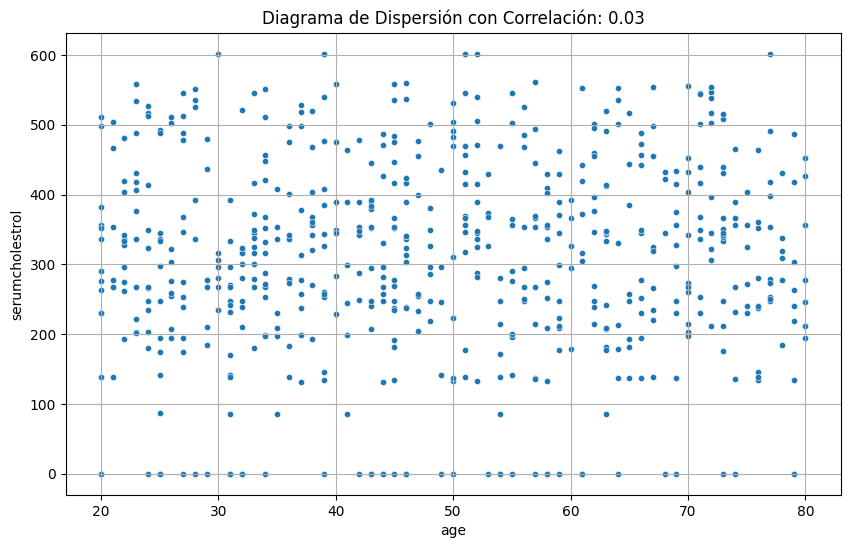

Respuesta 0:


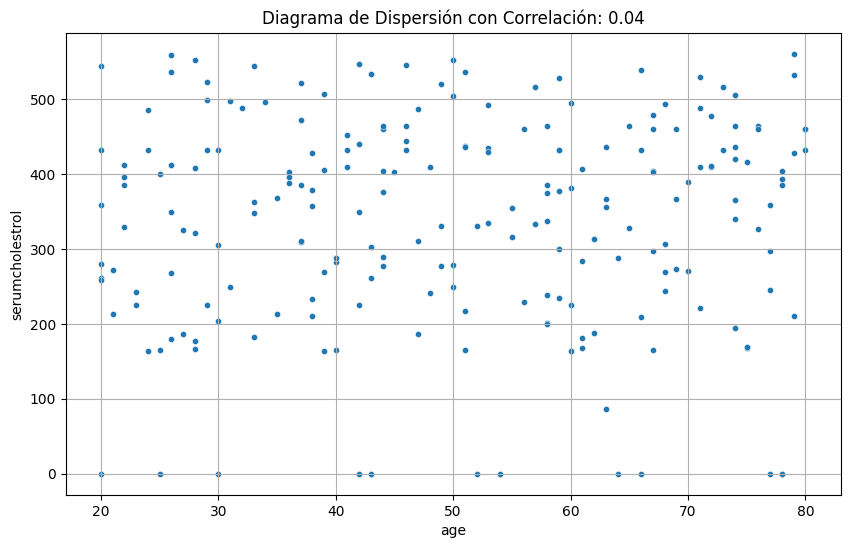

In [41]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

We cannot see any clear correlation between these three features.

3. Is there any relationship between the age and the maximum heart rate?


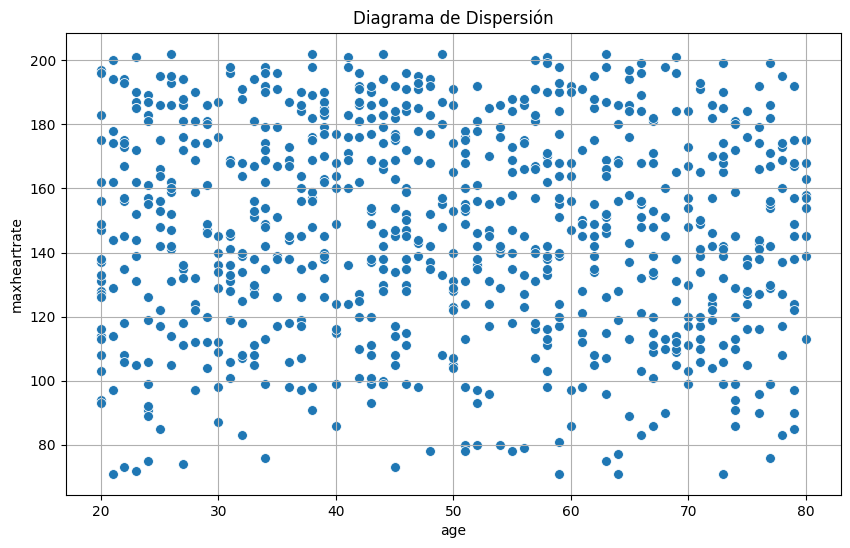

In [42]:
grafico_dispersion_con_correlacion(df, 'age', 'maxheartrate', tamano_puntos=50, mostrar_correlacion=False)

In [43]:
var1 = df['age']
var2 = df['maxheartrate']
correlation = var1.corr(var2)
print(f'Pearson correlation between both features: {correlation:.2f}')

Pearson correlation between both features: -0.06


This means that there is a very weak linear correlation between the two features being evaluated. The value of -0.06 indicates that there is a very slight negative relationship between them, suggesting that as one feature increases, the other tends to decrease slightly, or vice versa, but the relationship is minimal.

4. The serumcholesterol is related to the resting blood pressure? What about serumcholesterol with fasting blood sugar? Is the age an important factor too?


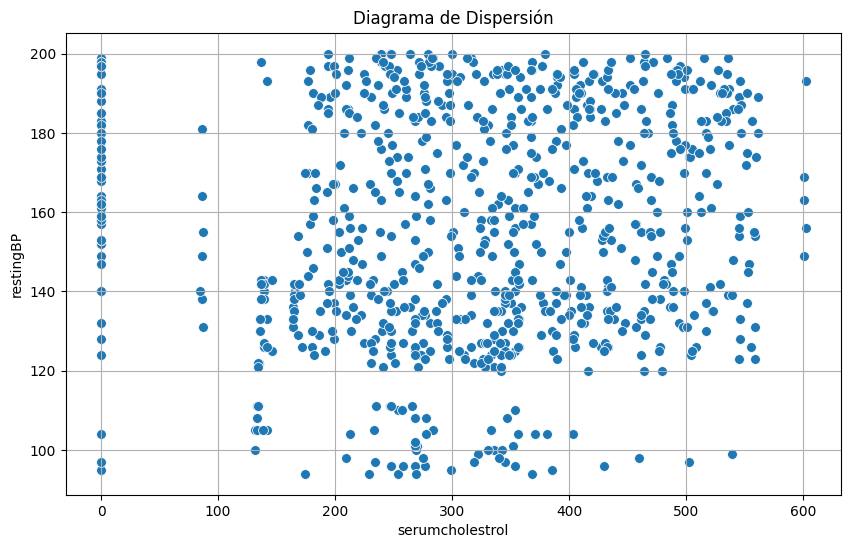

In [44]:
grafico_dispersion_con_correlacion(df, 'serumcholestrol', 'restingBP', tamano_puntos=50, mostrar_correlacion=False)

In [45]:
var1 = df['serumcholestrol']
var2 = df['restingBP']
correlation = var1.corr(var2)
print(f'Pearson correlation between both features: {correlation:.2f}')

Pearson correlation between both features: 0.10


This indicates that there is a weak positive Pearson correlation of 0.10 between serum cholesterol and resting blood pressure (restingBP).

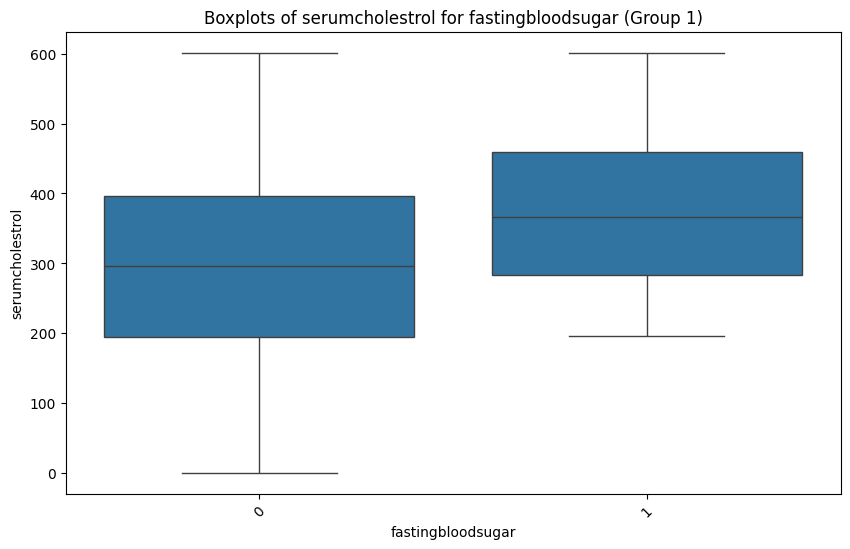

In [46]:
plot_grouped_boxplots(df,"fastingbloodsugar","serumcholestrol")

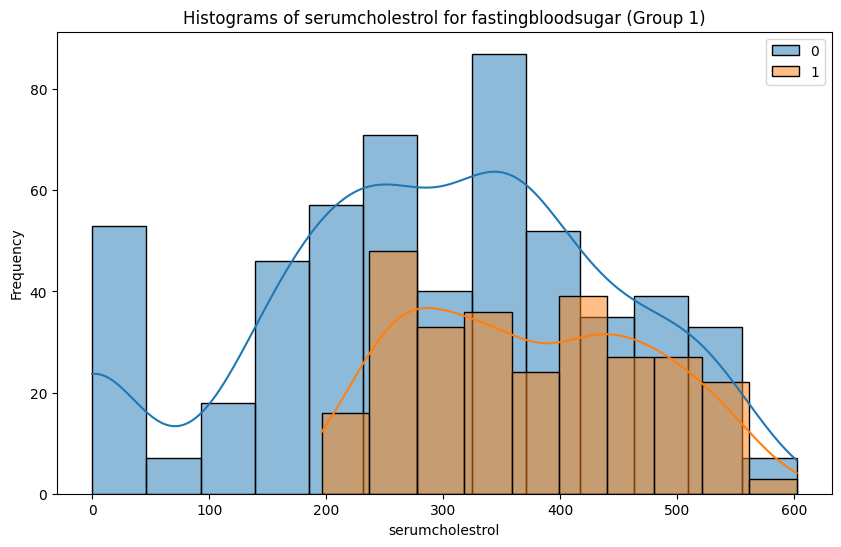

In [47]:
plot_grouped_histograms(df, "fastingbloodsugar","serumcholestrol", group_size = 2)

In [48]:
grupo_a = df.loc[df.fastingbloodsugar == 0]["serumcholestrol"]
grupo_b = df.loc[df.fastingbloodsugar == 1]["serumcholestrol"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 50945.0
Valor p: 6.705540975487171e-14


With p-value <<<<< 0.05, we can say that there's a statistic relation between both features.

5. Has the fasting blood sugar a relationship with the type of angina?


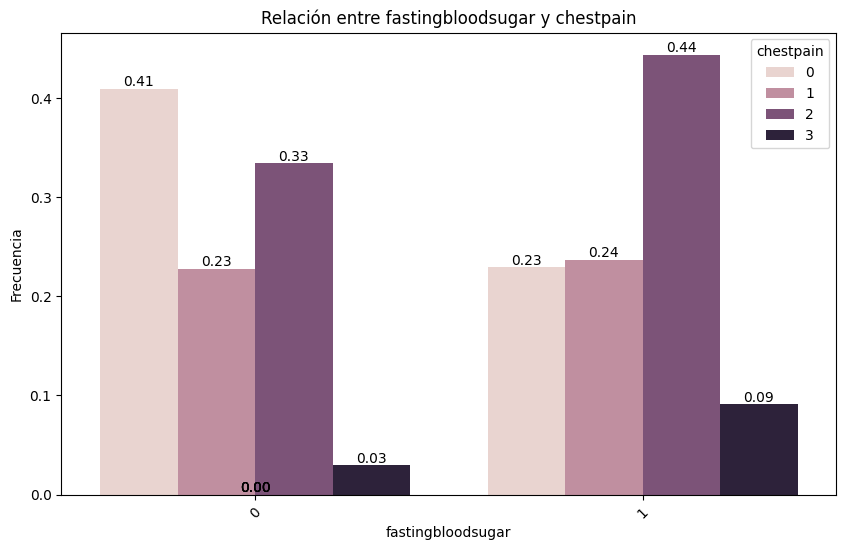

In [49]:
plot_categorical_relationship_fin(df, "fastingbloodsugar","chestpain", show_values= True, relative_freq= True)

We can see that value 3 of chestpain (asymptomatic) is not usual as the rest neither for high fasting blood sugar or low.
Surprisingly, a non-angina pain is mor eofthen in those patients that has a high fasting blood sugar. These patients are diabetic, and their way to experiment pain is different from those people that is not diabetic, which experiment a typical angina.

In [50]:
tabla_contingencia = pd.crosstab(df["fastingbloodsugar"],df["chestpain"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 36.83759935021952
P-Value: 4.980187547695568e-08
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[190.08536585 125.61585366 202.04878049  27.25      ]
 [ 95.91463415  63.38414634 101.95121951  13.75      ]]


With p-value <<< 0.05, we can say that there's a statistic relation between both features.

Respuesta 0:


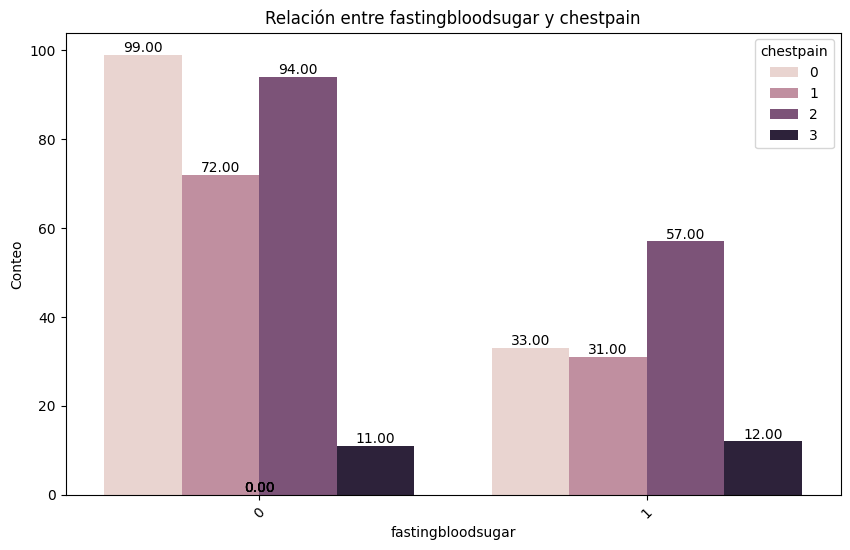

Respuesta 1:


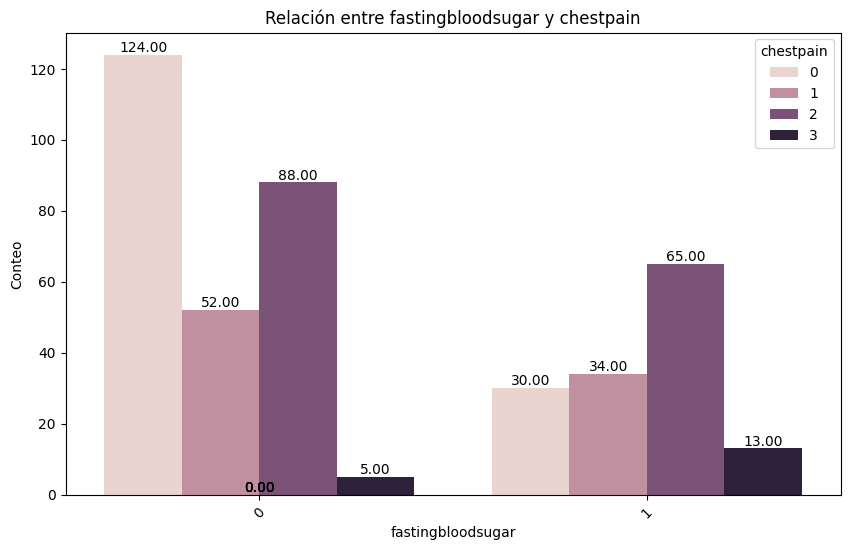

In [51]:
tricategorical_analysis(df = df, directora = "exerciseangia", otras = ["chestpain","fastingbloodsugar"], muestra_valores = True)

The values are similar in both graphs, thererfore, there's no relation with exerciseangia.

6. How many patients that have a chestpain while doing exercise are having an angina?


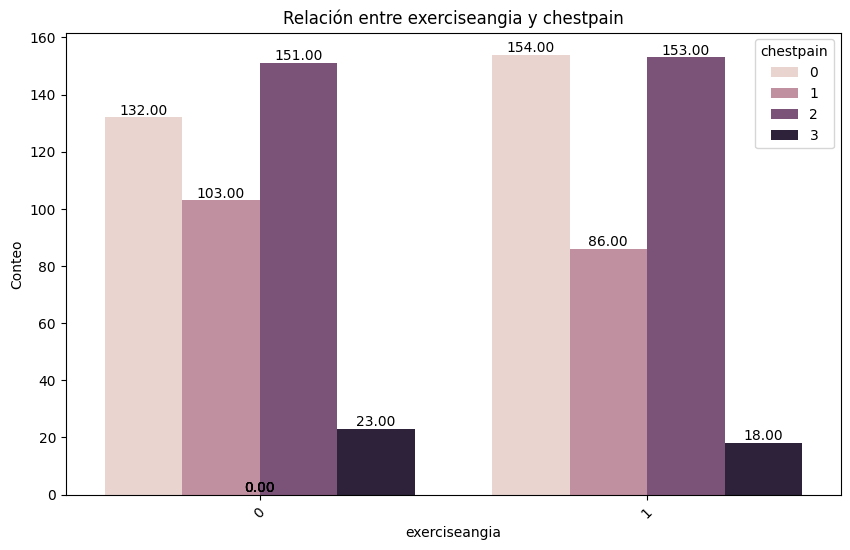

In [52]:
plot_categorical_relationship_fin(df, "exerciseangia","chestpain", show_values= True)

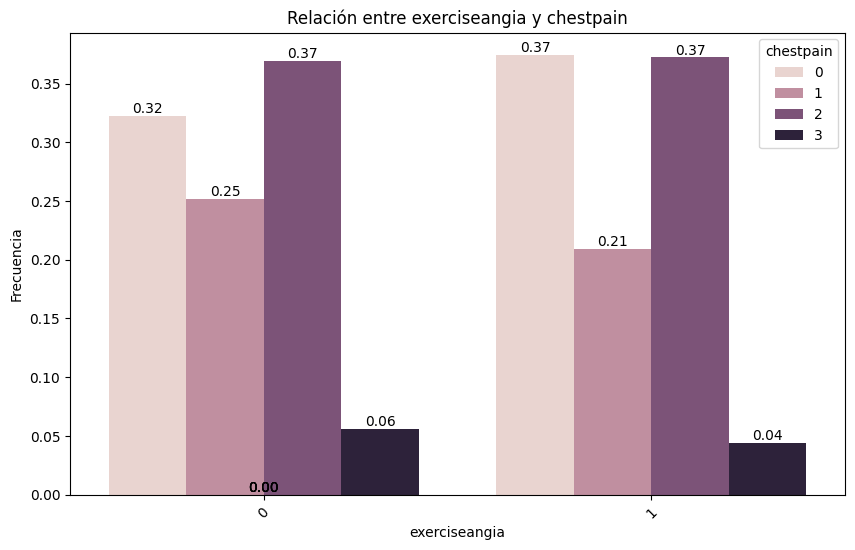

In [53]:
plot_categorical_relationship_fin(df, "exerciseangia","chestpain", relative_freq= True, show_values= True)

In [54]:
tabla_contingencia = pd.crosstab(df["exerciseangia"],df["chestpain"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3.839467005300363
P-Value: 0.27932871075306465
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[142.65121951  94.2695122  151.62926829  20.45      ]
 [143.34878049  94.7304878  152.37073171  20.55      ]]


As the p-value > 0.05, we do not have enough evidence to conclude that there is a significant difference or effect.

7. Are the blood pressure and serumcholesterol risk factors of a heart disease? 


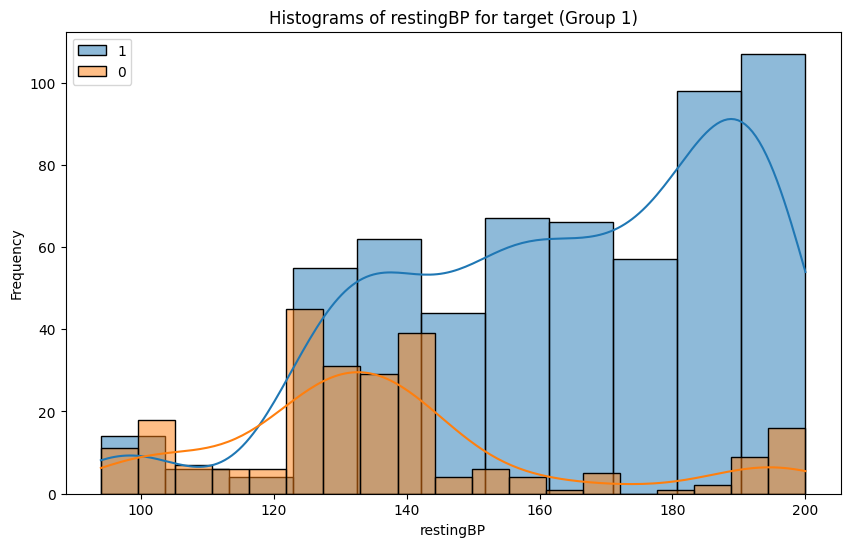

In [55]:
plot_grouped_histograms(df,"target","restingBP", group_size = 3)

Visually, there's a relationship between restingBP and the heartdisease. 

In [56]:
grupo_a = df.loc[df.target == 0]["restingBP"]
grupo_b = df.loc[df.target == 1]["restingBP"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 31844.0
Valor p: 2.0064107273880433e-34


With p-value <<< 0.05, we can say that there's a statistic relation between both features.

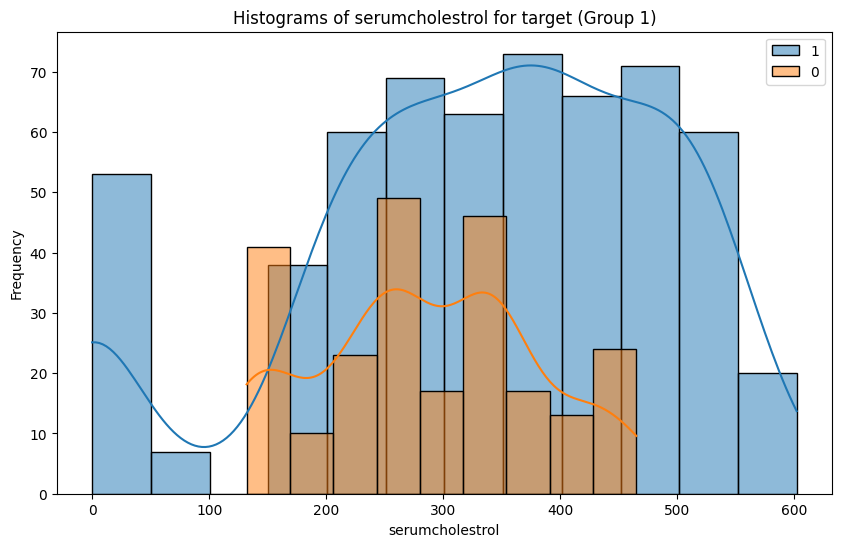

In [57]:
plot_grouped_histograms(df,"target","serumcholestrol", group_size = 3)

In [58]:
grupo_a = df.loc[df.target == 0]["serumcholestrol"]
grupo_b = df.loc[df.target == 1]["serumcholestrol"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 50614.0
Valor p: 7.603774773533961e-10


With p-value <<< 0.05, we can say that there's a statistic relation between both features.

8. How the chest pain and blood pressure affects the maximum heart frequency?


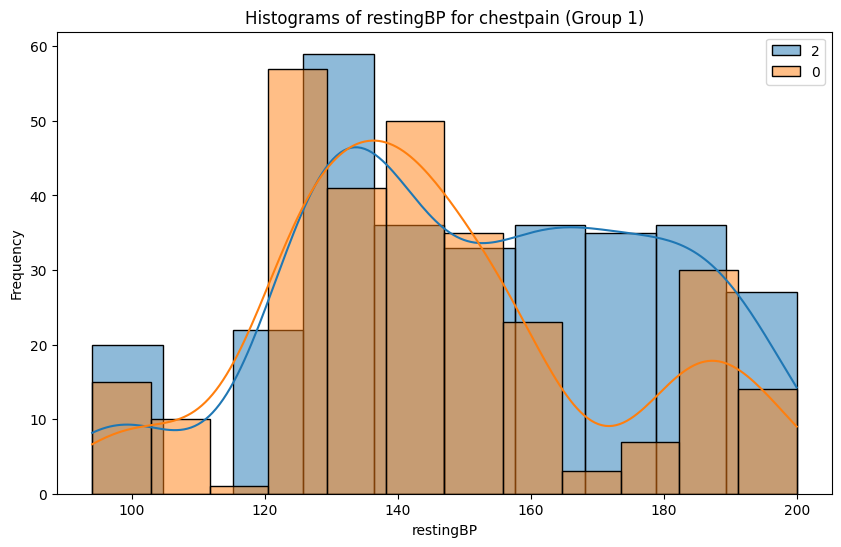

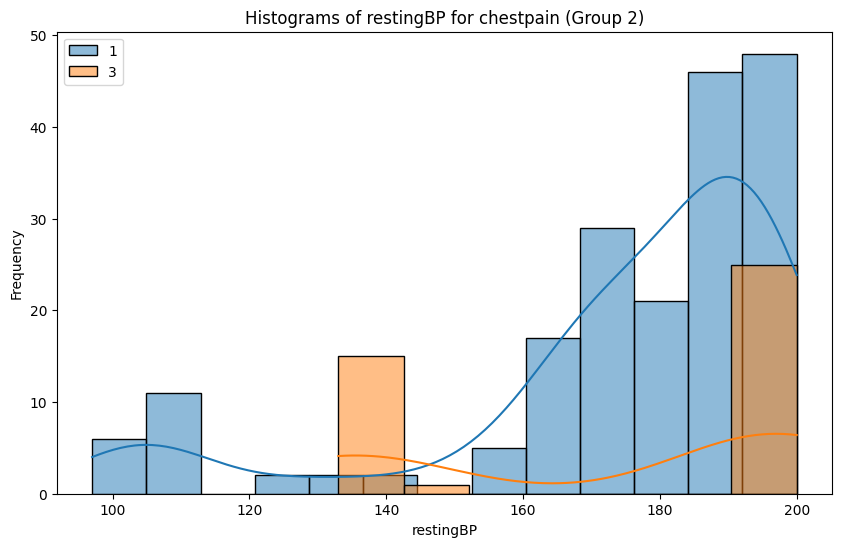

In [59]:
plot_grouped_histograms(df,"chestpain","restingBP", group_size = 2)

In [60]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#performing ANOVA test
# Fit the model
model = ols('restingBP ~ C(chestpain)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F        PR(>F)
C(chestpain)  118442.385083    3.0  57.148182  1.544869e-33
Residual      563733.219795  816.0        NaN           NaN


The p-value is extremely low (1.544869e-33), which is much smaller than the common significance level of 0.05. This indicates that there is a statistically significant difference in restingBP between the different chestpain categories. In other words, the type of chest pain is significantly associated with the resting blood pressure levels among these diabetic patients.

In [61]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['restingBP'], groups=df['chestpain'], alpha=0.05)
print(tukey)

NameError: name 'pairwise_tukeyhsd' is not defined

The Tukey HSD test results indicate that most pairwise comparisons between the chestpain groups are statistically significant, except for the comparison between group 1 and group 3. Specifically:

There are significant differences in restingBP between groups 0 and 1, groups 0 and 2, groups 0 and 3, groups 1 and 2, and groups 2 and 3.
There is no significant difference in restingBP between groups 1 and 3.

Summary of Significant Differences:
- Group 0 vs Group 1: Significant difference (Group 1 has higher restingBP)
- Group 0 vs Group 2: Significant difference (Group 2 has higher restingBP)
- Group 0 vs Group 3: Significant difference (Group 3 has higher restingBP)
- Group 1 vs Group 2: Significant difference (Group 1 has higher restingBP)
- Group 1 vs Group 3: No significant difference
- Group 2 vs Group 3: Significant difference (Group 2 has higher restingBP)

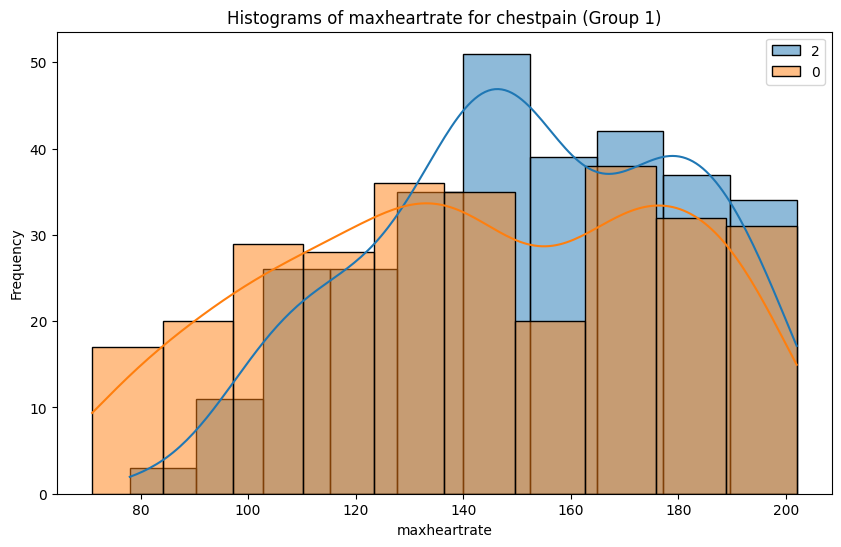

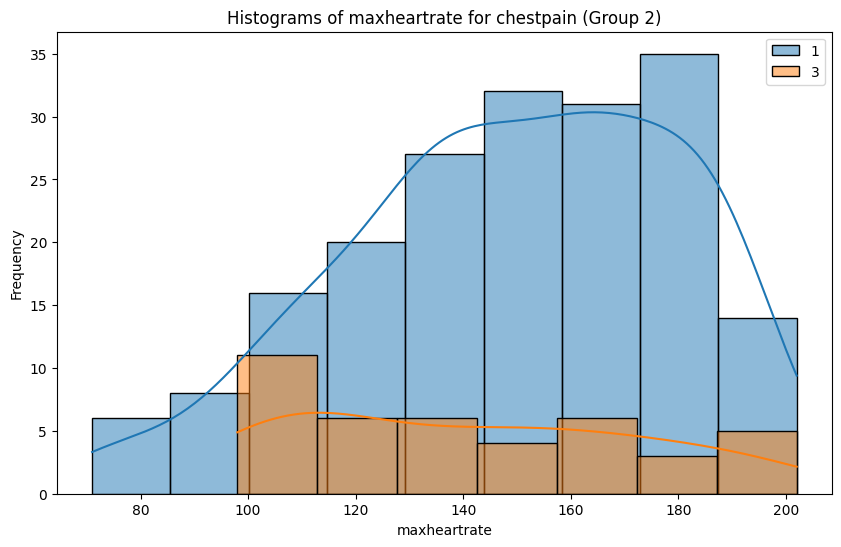

In [ ]:
plot_grouped_histograms(df,"chestpain","maxheartrate", group_size = 2)

In [ ]:
#performing ANOVA test
# Fit the model
model = ols('maxheartrate ~ C(chestpain)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df         F   PR(>F)
C(chestpain)   18924.175096    3.0  6.187581  0.00037
Residual      831888.179782  816.0       NaN      NaN


The p-value is very low (0.00037), which is much smaller than the common significance level of 0.05. This indicates that there is a statistically significant difference in restingBP between the different chestpain categories among these diabetic patients.

In [ ]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['maxheartrate'], groups=df['chestpain'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   7.2049 0.0765  -0.5003 14.9101  False
     0      2  10.6893 0.0003   3.9182 17.4604   True
     0      3  -0.6364 0.9994 -14.3626 13.0899  False
     1      2   3.4844 0.6409  -4.1295 11.0983  False
     1      3  -7.8413 0.4837 -22.0022  6.3197  False
     2      3 -11.3257 0.1438 -25.0008  2.3495  False
-----------------------------------------------------


The Tukey HSD test results indicate that the only significant difference in the dependent variable is between groups 0 and 2. For all other pairwise comparisons, there are no significant differences.

Summary of Significant Differences:
- Group 0 vs Group 2: Significant difference (Group 2 has a higher mean than Group 0)
- All other pairwise comparisons show no significant differences.

In [ ]:
col_directora = "chestpain"
col_1 = "restingBP"
col_2 = "maxheartrate"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

Respuesta 2:


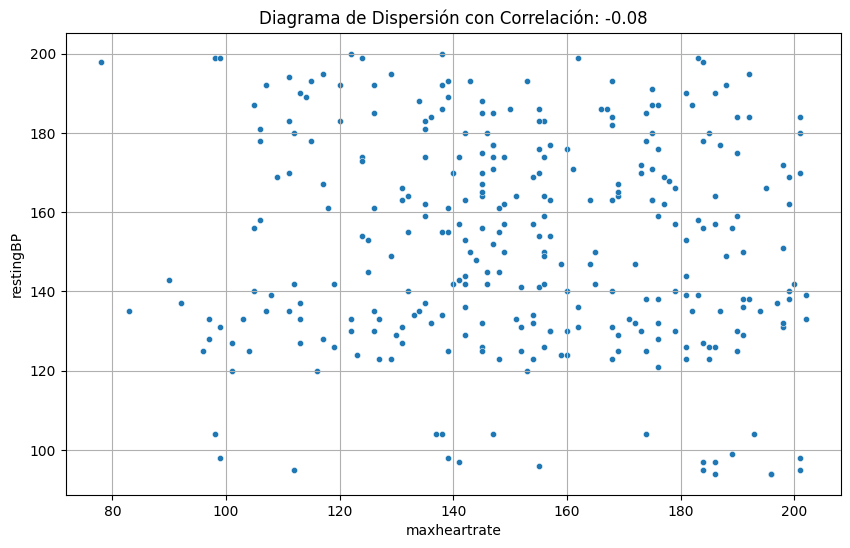

Respuesta 0:


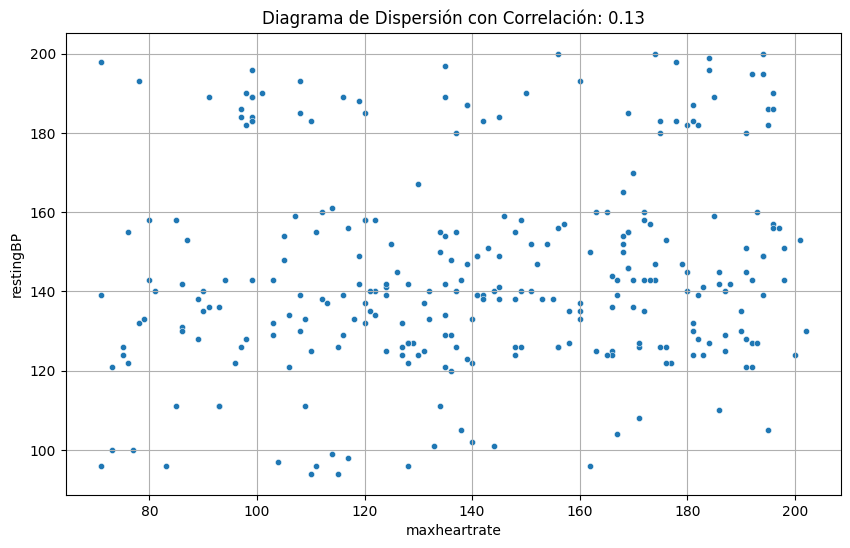

Respuesta 1:


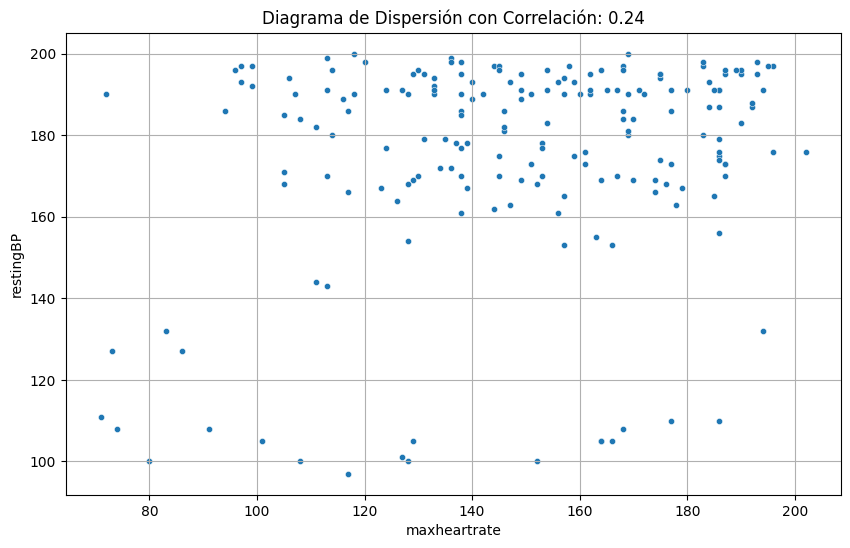

Respuesta 3:


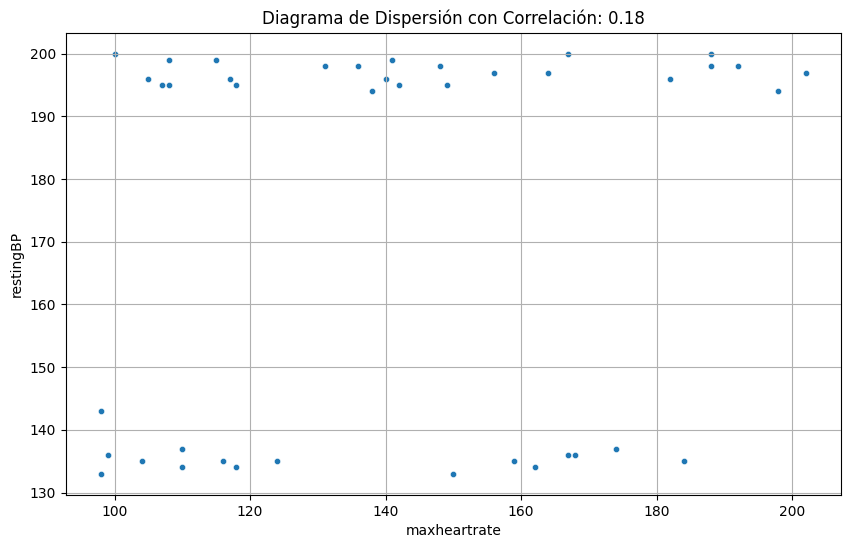

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

9. Is there any relation between fasting blood sugar, serum cholesterol and the heart disease?


In [ ]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size)

Respuesta 1:


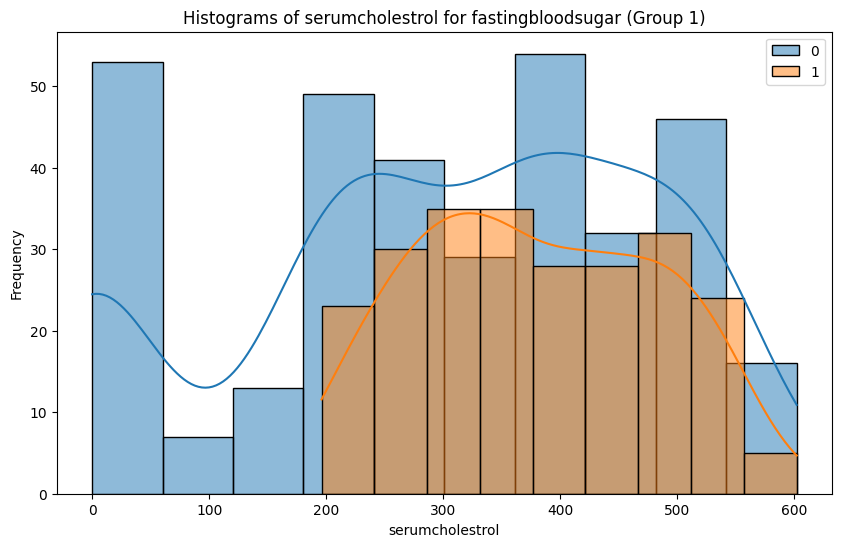

Respuesta 0:


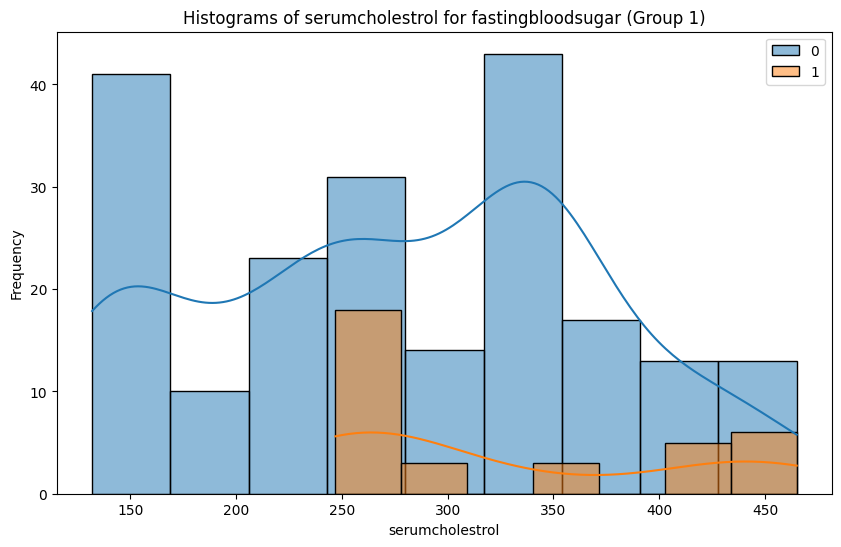

In [ ]:
trivariant_analysis(df, "target","fastingbloodsugar","serumcholestrol", 2, 30)


There is a significance on these three features. As we can see in the second histogram, the target is 0 (no heart disease) the frequency is higher when the fasting blood sugar is lower than 120 mg/dl, although the serumcholestrol is increasing. 

10. Is there any relationship between resting electrocardiogram parameters and their relationship with ST depression (oldpeak) and the ST segment slope?


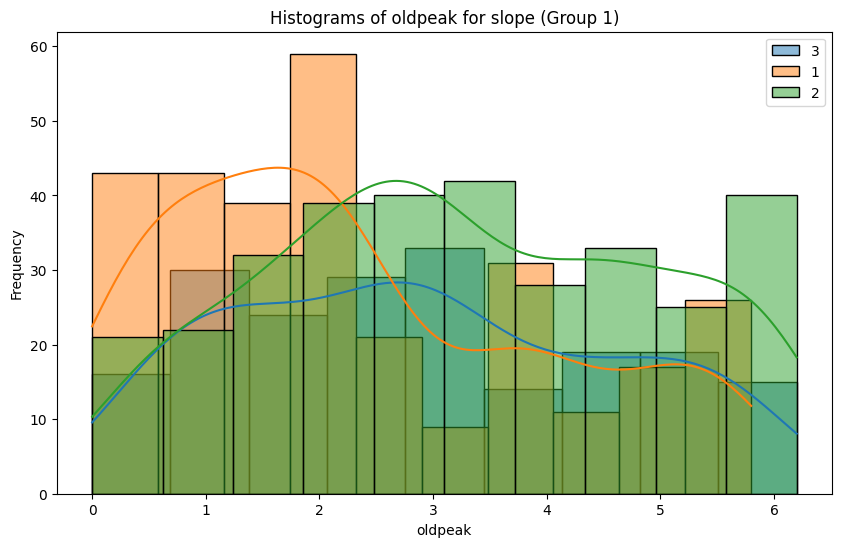

In [ ]:
plot_grouped_histograms(df,"slope","oldpeak", group_size = 3)

In [ ]:
#performing ANOVA test
# Fit the model
model = ols('oldpeak ~ C(slope)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq     df          F        PR(>F)
C(slope)   137.724457    2.0  24.682597  3.907089e-11
Residual  2279.356653  817.0        NaN           NaN


The p-value is extremely low (3.907089e-11), which is much smaller than the common significance level of 0.05. This indicates that there is a statistically significant difference in the dependent variable (whatever it might be in your full dataset) between the different slope categories

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['oldpeak'], groups=df['slope'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.9377    0.0  0.6228  1.2527   True
     1      3   0.5823 0.0004  0.2235  0.9411   True
     2      3  -0.3555 0.0485 -0.7091 -0.0018   True
----------------------------------------------------


The Tukey HSD test results indicate that all pairwise comparisons between the slope groups are statistically significant. Specifically:

There is a significant difference in the means between group 1 and group 2.
There is a significant difference in the means between group 1 and group 3.
There is a significant difference in the means between group 2 and group 3.

These results suggest that the slope variable has a significant impact on the dependent variable you are analyzing. The exact nature of this impact (which slope values are higher or lower) can be seen from the mean differences, where:

- Group 2 has a higher mean than Group 1.
- Group 3 has a lower mean than Group 1.
- Group 3 has a lower mean than Group 2.

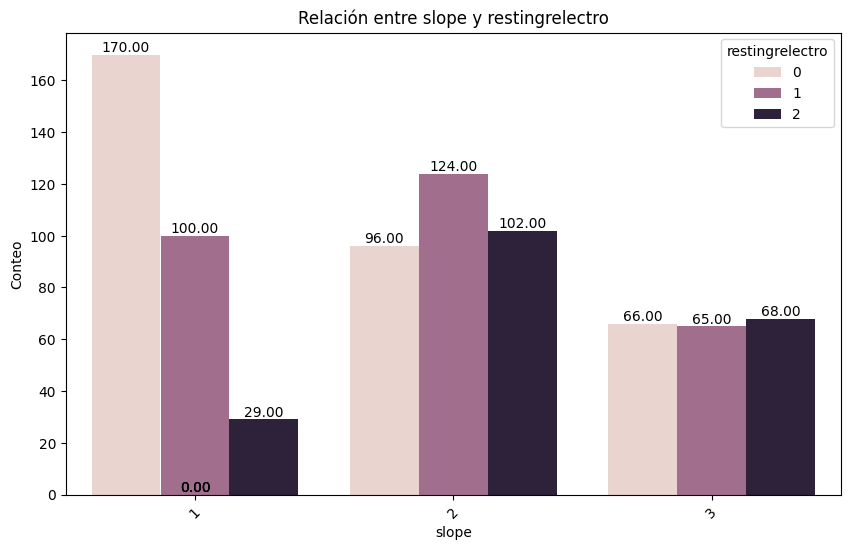

In [ ]:
plot_categorical_relationship_fin(df, "slope","restingrelectro", show_values= True)

In [ ]:
tabla_contingencia = pd.crosstab(df["slope"],df["restingrelectro"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 74.5834273707069
P-Value: 2.4407276925004766e-15
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[121.05853659 105.37926829  72.56219512]
 [130.37073171 113.48536585  78.14390244]
 [ 80.57073171  70.13536585  48.29390244]]


The very low p-value (2.4407276925004766e-15) indicates that there is a statistically significant association between the two categorical variables being tested. This means that the differences observed between the expected and actual frequencies are unlikely to have occurred by chance.

Respuesta 3:


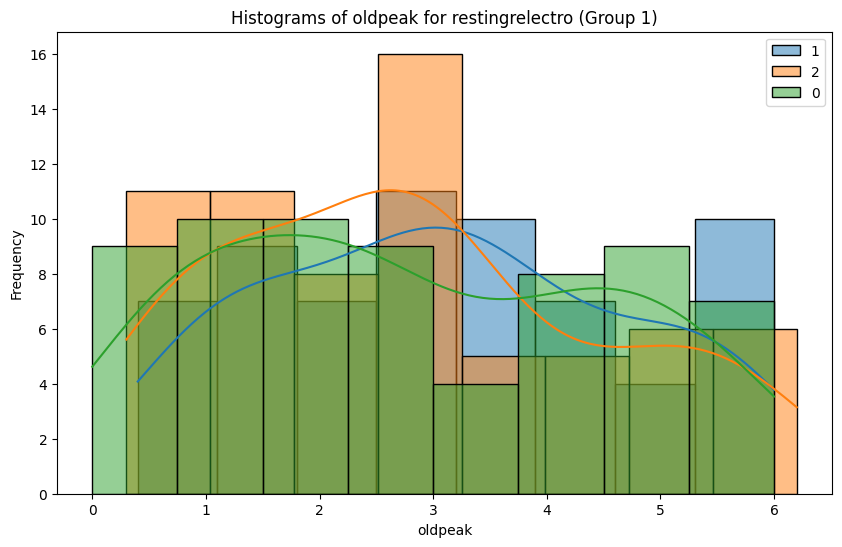

Respuesta 1:


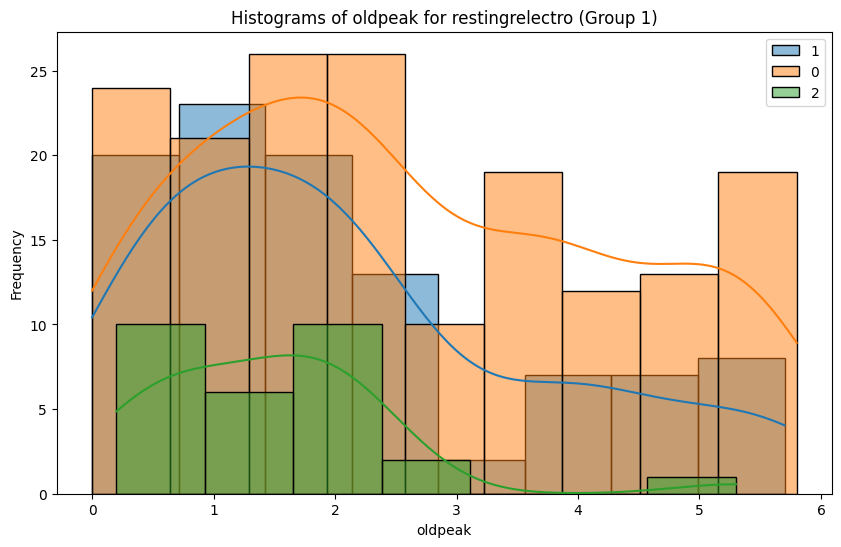

Respuesta 2:


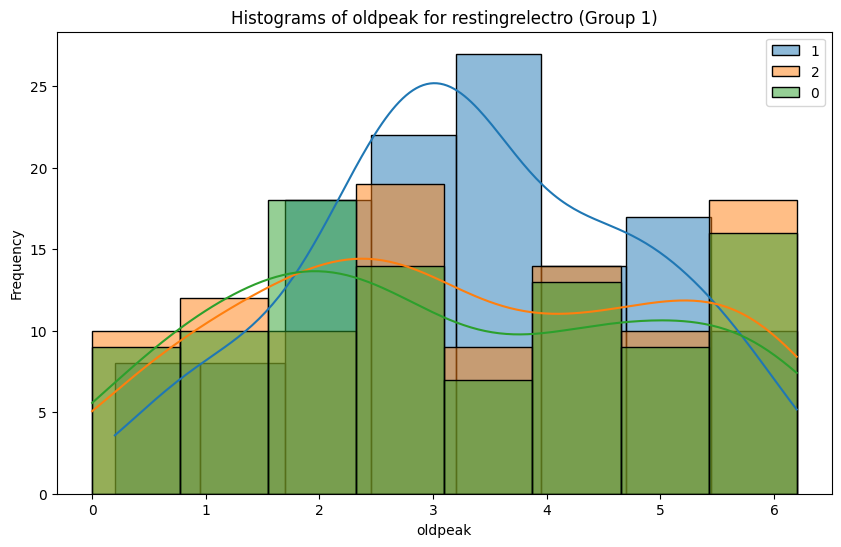

In [ ]:
trivariant_analysis(df, "slope","restingrelectro","oldpeak", 3, 30)

11. How the number of major vessels affected and the type of chest pain are related to the outcome of heart disease?

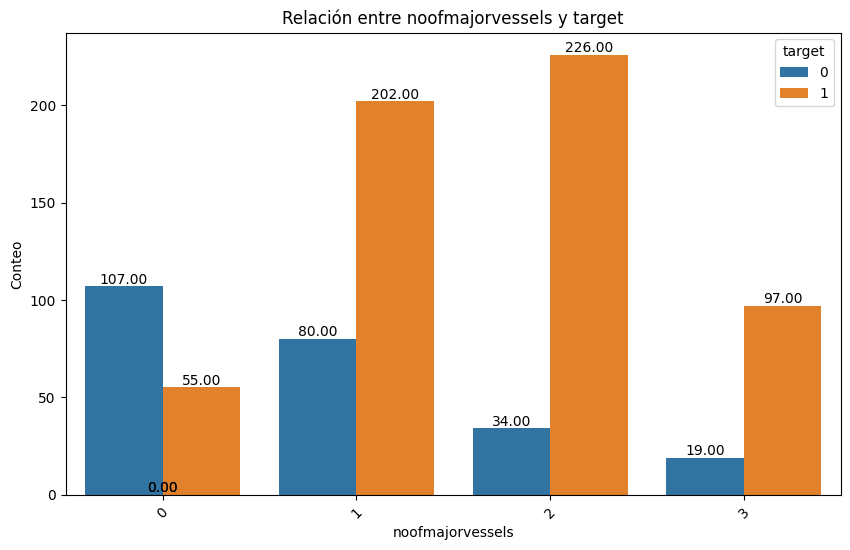

In [ ]:
plot_categorical_relationship_fin(df, "noofmajorvessels","target", show_values= True)

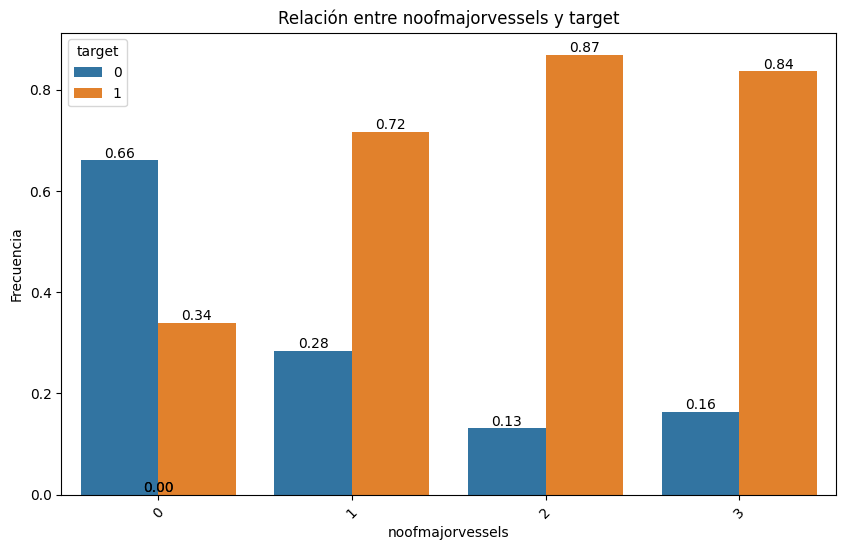

In [ ]:
plot_categorical_relationship_fin(df, "noofmajorvessels","target",relative_freq= True, show_values= True)

The number of major vessels is important in how the patients have a heart disease. 0 vessels has a 66% of patients that has no heart disease, but it is visible that having one or more major vessels affected is important to determine that patient has a heart disease. 

In [ ]:
tabla_contingencia = pd.crosstab(df["noofmajorvessels"],df["target"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 148.20911024777217
P-Value: 6.413267034978352e-32
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[ 47.41463415 114.58536585]
 [ 82.53658537 199.46341463]
 [ 76.09756098 183.90243902]
 [ 33.95121951  82.04878049]]


In our analysis, a Chi-Squared test was conducted to examine the relationship between [Variable 1] and [Variable 2]. The test revealed a significant association (Chi-Squared = 148.209, p < 0.001, df = 3). The expected frequencies differed substantially from the observed frequencies, suggesting a strong relationship between the categories of these variables. Further analysis is needed to explore the nature and implications of this association.

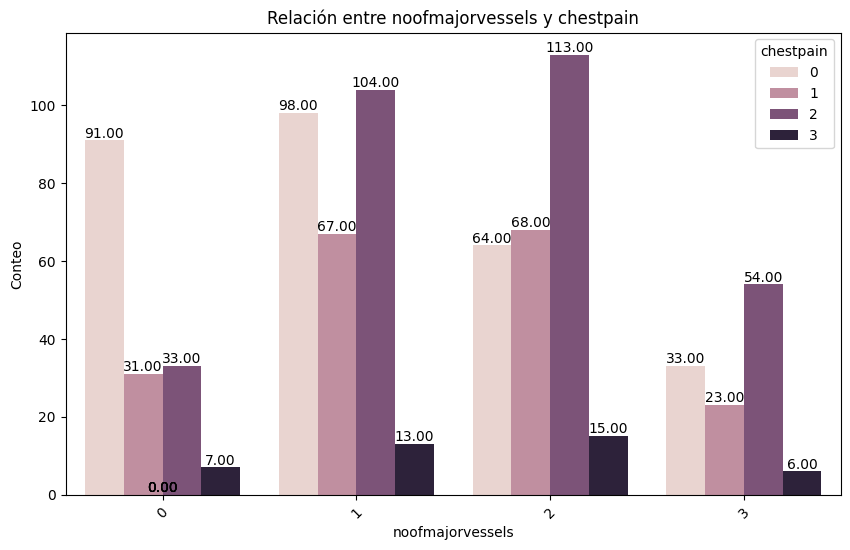

In [ ]:
plot_categorical_relationship_fin(df, "noofmajorvessels","chestpain", show_values= True)

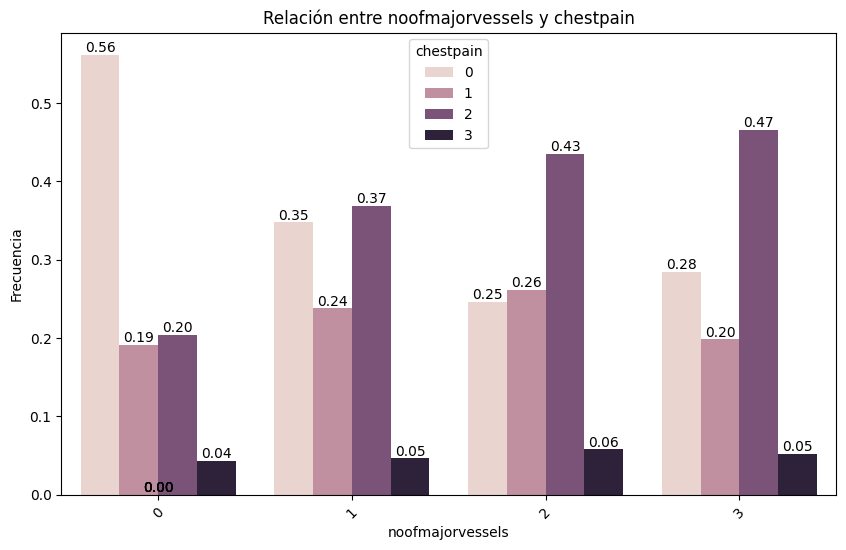

In [ ]:
plot_categorical_relationship_fin(df, "noofmajorvessels","chestpain",relative_freq= True, show_values= True)

In [ ]:
tabla_contingencia = pd.crosstab(df["noofmajorvessels"],df["chestpain"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 51.4545036298937
P-Value: 5.7311923096344945e-08
Grados de Libertad: 9
Tabla de Frecuencias Esperadas:
 [[ 56.50243902  37.33902439  60.05853659   8.1       ]
 [ 98.35609756  64.99756098 104.54634146  14.1       ]
 [ 90.68292683  59.92682927  96.3902439   13.        ]
 [ 40.45853659  26.73658537  43.00487805   5.8       ]]


Significant Association: The very small p-value (5.7311923096344945e-08) indicates a statistically significant association between the two categorical variables.
Expected vs. Observed Frequencies: The observed frequencies differ significantly from the expected frequencies, further supporting the conclusion of association.

Respuesta 1:


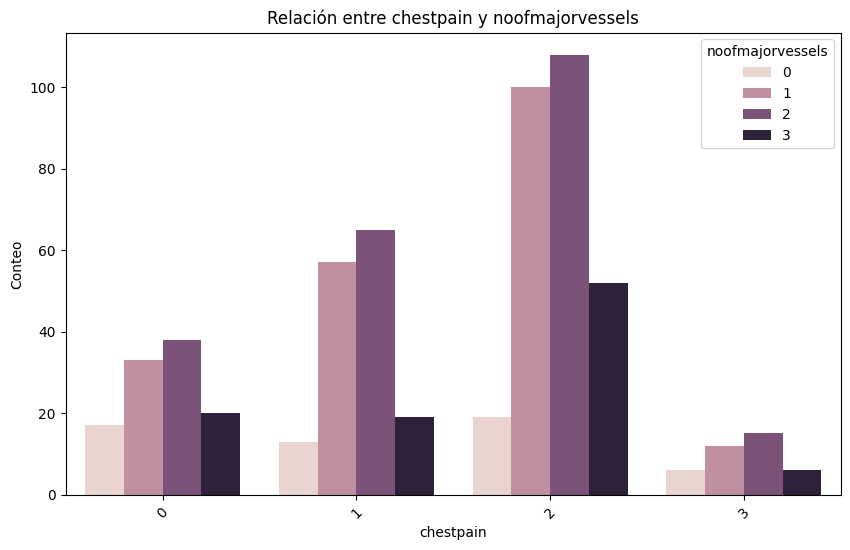

Respuesta 0:


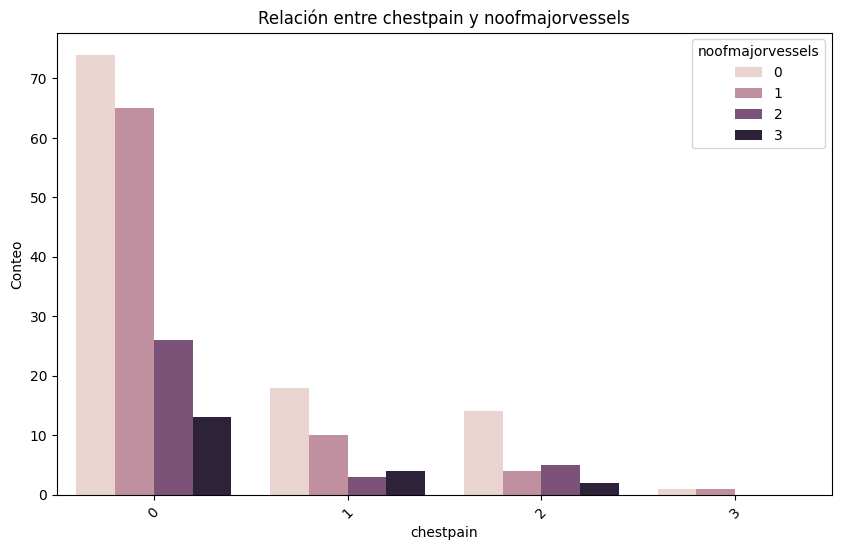

In [ ]:
tricategorical_analysis(df, "target", ["noofmajorvessels","chestpain"])